In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cha=pd.read_csv('CLEAN_charity_data.csv')

In [3]:
cha.head()

,ascore,category,description,ein,tot_exp,admin_exp_p,fund_eff,fund_exp_p,program_exp_p,fscore,...,motto,name,tot_rev,score,state,subcategory,size,program_exp,fund_exp,admin_exp
0,100.0,Environment,Working with Oregonians to enhance our quality...,93-0642086,917313.0,0.101,0.18,0.184,0.714,88.61,...,Great communities. Working lands. Iconic Places.,1000 Friends of Oregon,1022513.0,91.94,OR,Environmental Protection and Conservation,small,6.549615e+05,168785.592,92648.613
1,89.0,"Arts, Culture, Humanities",Serving the metropolitan Baltimore area and th...,31-1770828,5053059.0,0.231,0.05,0.032,0.735,82.85,...,88.1 FM -. Your NPR News Station,WYPR,5685761.0,85.59,MD,Public Broadcasting and Media,mid,3.713998e+06,161697.888,1167256.629
2,70.0,Religion,VSS Catholic Communications is dedicated to an...,91-1857425,1891500.0,0.114,0.17,0.197,0.687,86.74,...,Spirit Catholic Radio Network,VSS Catholic Communications,2140836.0,76.80,NE,Religious Media and Broadcasting,small,1.299460e+06,372625.500,215631.000
3,93.0,"Arts, Culture, Humanities",The mission of the Utah Symphony & Opera is to...,51-0145980,22506582.0,0.092,0.08,0.054,0.852,91.03,...,"Engaging, educating, and enriching lives",Utah Symphony & Opera,22203175.0,91.95,UT,Performing Arts,big,1.917561e+07,1215355.428,2070605.544
4,100.0,Human Services,"Funded solely by the footwear industry, Two Te...",22-2579809,5594243.0,0.126,0.12,0.122,0.750,86.23,...,Shoepeople Helping Shoepeople,Two Ten Footwear Foundation,6935506.0,90.26,MA,Social Services,mid,4.195682e+06,682497.646,704874.618


In [4]:
print("Columns Head:\n",cha.columns)

Columns Head:
 Index(['ascore', 'category', 'description', 'ein', 'tot_exp', 'admin_exp_p',
       'fund_eff', 'fund_exp_p', 'program_exp_p', 'fscore', 'leader',
       'leader_comp', 'leader_comp_p', 'motto', 'name', 'tot_rev', 'score',
       'state', 'subcategory', 'size', 'program_exp', 'fund_exp', 'admin_exp'],
      dtype='object')


In [5]:
# Check for data type
cha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8408 entries, 0 to 8407
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ascore         8408 non-null   float64
 1   category       8408 non-null   object 
 2   description    8408 non-null   object 
 3   ein            8408 non-null   object 
 4   tot_exp        8408 non-null   float64
 5   admin_exp_p    8408 non-null   float64
 6   fund_eff       8408 non-null   float64
 7   fund_exp_p     8408 non-null   float64
 8   program_exp_p  8408 non-null   float64
 9   fscore         8408 non-null   float64
 10  leader         8408 non-null   object 
 11  leader_comp    7972 non-null   float64
 12  leader_comp_p  7972 non-null   float64
 13  motto          8395 non-null   object 
 14  name           8408 non-null   object 
 15  tot_rev        8408 non-null   float64
 16  score          8408 non-null   float64
 17  state          8408 non-null   object 
 18  subcateg

In [6]:
# Check for missing values
cha.isnull().sum()

ascore             0
category           0
description        0
ein                0
tot_exp            0
admin_exp_p        0
fund_eff           0
fund_exp_p         0
program_exp_p      0
fscore             0
leader             0
leader_comp      436
leader_comp_p    436
motto             13
name               0
tot_rev            0
score              0
state              0
subcategory        0
size               0
program_exp        0
fund_exp           0
admin_exp          0
dtype: int64

<AxesSubplot:>

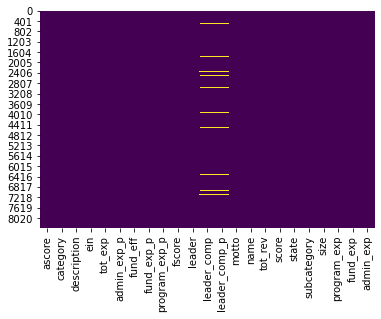

In [7]:
# Visualizing the missing values - help to decide whether to drop these missing values or to replace them
sns.heatmap(cha.isnull(), cbar=False, cmap='viridis')
# since there are quite a few leader_comp & leader_comp_p data missing, dropping data is not advisable, 
# so I decide to replace them by mean

In [8]:
# Replace NaN in leader_comp & leader_comp_p
# Motta won't be neccessary to fill in, so just let it NaN
meanLeaderCompPercentage = cha['leader_comp_p'].mean()
meanLeaderCompValue = meanLeaderCompPercentage * cha['tot_exp']
cha['leader_comp_p'].fillna(value=meanLeaderCompPercentage, inplace=True)
cha['leader_comp'].fillna(value=meanLeaderCompValue, inplace=True)

cha.isnull().sum()

ascore            0
category          0
description       0
ein               0
tot_exp           0
admin_exp_p       0
fund_eff          0
fund_exp_p        0
program_exp_p     0
fscore            0
leader            0
leader_comp       0
leader_comp_p     0
motto            13
name              0
tot_rev           0
score             0
state             0
subcategory       0
size              0
program_exp       0
fund_exp          0
admin_exp         0
dtype: int64

In [9]:
cha['size'].head()

0    small
1      mid
2    small
3      big
4      mid
Name: size, dtype: object

In [10]:
# Replace size object to integer
cha['size'].replace(to_replace ="small", value =1, inplace=True)
cha['size'].replace(to_replace ="mid", value =2, inplace=True)
cha['size'].replace(to_replace ="big", value =3, inplace=True)

In [11]:
cha['size'].head()

0    1
1    2
2    1
3    3
4    2
Name: size, dtype: int64

In [12]:
cha['category'].head()

0                  Environment
1    Arts, Culture, Humanities
2                     Religion
3    Arts, Culture, Humanities
4               Human Services
Name: category, dtype: object

In [13]:
cha['category_split'] = cha['category'].str.split(",")

In [14]:
cha['category_split'].head()

0                    [Environment]
1    [Arts,  Culture,  Humanities]
2                       [Religion]
3    [Arts,  Culture,  Humanities]
4                 [Human Services]
Name: category_split, dtype: object

In [15]:
# Counting one type in 'category_split' column
filter1 = cha.apply(lambda row: "Environment" in row['category_split'], axis=1)
category_cha = cha[filter1]
# category_cha.drop(['category','description','ein','tot_exp','admin_exp','fund_exp','program_exp'],axis=1)
category_cha['category_split']

0       [Environment]
14      [Environment]
38      [Environment]
45      [Environment]
76      [Environment]
            ...      
8060    [Environment]
8123    [Environment]
8182    [Environment]
8393    [Environment]
8394    [Environment]
Name: category_split, Length: 429, dtype: object

In [16]:
# Counting each category row
category_counter = {}
for index,row in cha.iterrows():
    for catego in row['category_split']:
        category_counter[catego] = category_counter.get(catego,0)+1 #dictionary.get(keyname, value(optional, if no value on that key, return designate value))
category_counter

{'Environment': 429,
 'Arts': 1218,
 ' Culture': 1218,
 ' Humanities': 1218,
 'Religion': 450,
 'Human Services': 2379,
 'Education': 667,
 'Animals': 454,
 'International': 610,
 'Health': 847,
 'Community Development': 803,
 'Human and Civil Rights': 346,
 'Research and Public Policy': 205}

In [17]:
cha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8408 entries, 0 to 8407
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ascore          8408 non-null   float64
 1   category        8408 non-null   object 
 2   description     8408 non-null   object 
 3   ein             8408 non-null   object 
 4   tot_exp         8408 non-null   float64
 5   admin_exp_p     8408 non-null   float64
 6   fund_eff        8408 non-null   float64
 7   fund_exp_p      8408 non-null   float64
 8   program_exp_p   8408 non-null   float64
 9   fscore          8408 non-null   float64
 10  leader          8408 non-null   object 
 11  leader_comp     8408 non-null   float64
 12  leader_comp_p   8408 non-null   float64
 13  motto           8395 non-null   object 
 14  name            8408 non-null   object 
 15  tot_rev         8408 non-null   float64
 16  score           8408 non-null   float64
 17  state           8408 non-null   o

ascore: accountability & transparency score <br>
fscore: financial health score <br>
score: overall score

# check the correlation
check the correlation between different variables us on how to proceed further with a corelation roadmap

<AxesSubplot:>

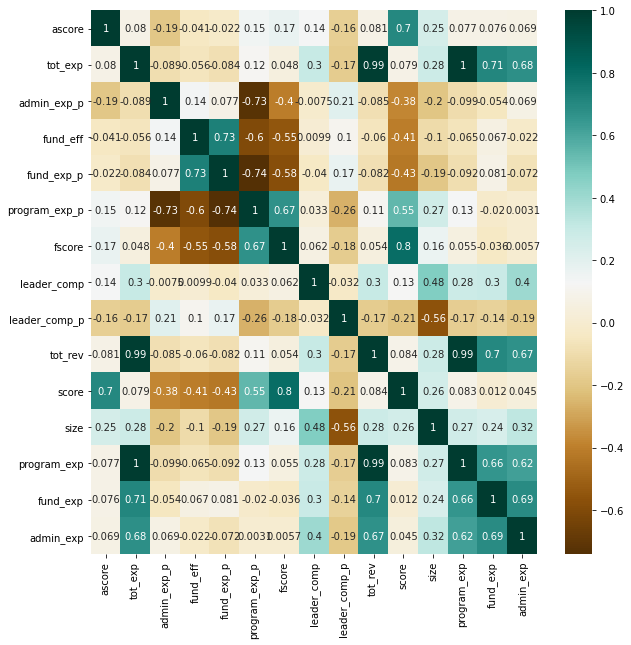

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(cha.corr(),cbar=True,annot=True,cmap='BrBG')

How to increase donors interest in investing onto recommend charities
target variable
independant variable: category, subcategory|fscore, ascore, score|size|distribution of admin_exp_p, program_exp_p, fund_exp_p

<h3>Positive Correlation</h3> 
-admin_exp: fund_exp, program_exp, tot_rev, tot_exp; leader_comp
-fund_exp: tot_exp, tot_rev, admin_exp, program_exp_e
-program_exp: (tot_exp, tot_rev,) fund_exp, admin_exp
-fscore: (score,) ascore, program_exp_p
-ascore: (score,) 
-fund_eff: (fund_exp_p,)
-tot_rev: tot_exp, program_exp, fund_exp, admin_exp
-leader_comp_p: size
-size: leader_comp
<h3>Negative Correlation</h3>
-fscore: fund_exp_p, fund_eff, admin_exp_p
-ascore: -0.19
-fund_eff: program_exp_p, tscore, score
-tot_rev: -0.17
-leader_comp_p: size
-size: leader_comp_p <br>
(focus on >= +/-0.4 correlation

# Exploratory Questions
Questions related to "independent variables" and the "target variable"

1. How do fscore, ascore affect exp distribution(program_exp, fund_exp, admin_exp)?
2. Does size relate to categories?
3. Does size relate to exp distribution?
4. What categories tend to have higher/lower tot_exp when they are the same size charity?

In [19]:
!pip install sweetviz
import sweetviz as sv

In [20]:
# Filter Environment category in category column
filter1 = cha.apply(lambda row:"Environment" in row["category"], axis=1)
cha[filter1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 0 to 8394
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ascore          429 non-null    float64
 1   category        429 non-null    object 
 2   description     429 non-null    object 
 3   ein             429 non-null    object 
 4   tot_exp         429 non-null    float64
 5   admin_exp_p     429 non-null    float64
 6   fund_eff        429 non-null    float64
 7   fund_exp_p      429 non-null    float64
 8   program_exp_p   429 non-null    float64
 9   fscore          429 non-null    float64
 10  leader          429 non-null    object 
 11  leader_comp     429 non-null    float64
 12  leader_comp_p   429 non-null    float64
 13  motto           429 non-null    object 
 14  name            429 non-null    object 
 15  tot_rev         429 non-null    float64
 16  score           429 non-null    float64
 17  state           429 non-null    ob

In [21]:
%%time
# Counting each category in category column
category_counter = {}
for cat in cha["category"]:
    category_counter[cat] = category_counter.get(cat, 0)+1      
print(category_counter)

{'Environment': 429, 'Arts, Culture, Humanities': 1218, 'Religion': 450, 'Human Services': 2379, 'Education': 667, 'Animals': 454, 'International': 610, 'Health': 847, 'Community Development': 803, 'Human and Civil Rights': 346, 'Research and Public Policy': 205}
Wall time: 5.97 ms


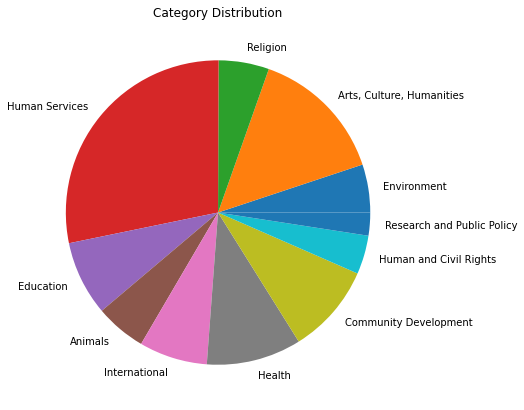

In [22]:
plt.figure(figsize=(7,7))
plt.pie(list(category_counter.values()), labels=category_counter.keys())
plt.title("Category Distribution")
plt.show()

# Content-based filtering
k-means clustering for unsupervised learning

Plot description based recommender<br>
Natural Language Processing (NPL) + cosine similarities <br>
https://www.datacamp.com/community/tutorials/recommender-systems-python

In [23]:
# Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each description
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
cha['description_tfidf'] = cha['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(cha['description_tfidf'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(8408, 21339)

There is 21339 different vocabularies/words in the description, which has 8408 charities.

In [24]:
#Array mapping from feature integer indices to feature name.
tfidf.get_feature_names()[5000:5010]

['councils',
 'counsel',
 'counseled',
 'counseling',
 'counselor',
 'counselors',
 'counsels',
 'count',
 'counter',
 'counteracting']

There are several similarity metrics that we can use for this, such as 
<h3>the manhattan<br>
euclidean: ppl use this more often<br>
    the Pearson<br>
    the cosine similarity scores.</h3> 
There is no right answer to which score is the best. Different scores work well in different scenarios, and it is often a good idea to <strong>experiment with different metrics and observe the results.</strong>

# cosine similarity

In [25]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [26]:
cosine_sim.shape

(8408, 8408)

In [27]:
cosine_sim[:]

array([[1.        , 0.00964056, 0.        , ..., 0.01112666, 0.        ,
        0.03405581],
       [0.00964056, 1.        , 0.02159964, ..., 0.00148839, 0.00955938,
        0.02509763],
       [0.        , 0.02159964, 1.        , ..., 0.0041108 , 0.0043083 ,
        0.        ],
       ...,
       [0.01112666, 0.00148839, 0.0041108 , ..., 1.        , 0.01283096,
        0.01152775],
       [0.        , 0.00955938, 0.0043083 , ..., 0.01283096, 1.        ,
        0.00887935],
       [0.03405581, 0.02509763, 0.        , ..., 0.01152775, 0.00887935,
        1.        ]])

In [28]:
#Construct a reverse map of indices and charity titles
indices = pd.Series(cha.index, index=cha['name']).drop_duplicates()

In [29]:
indices[:10]

name
1000 Friends of Oregon              0
WYPR                                1
VSS Catholic Communications         2
Utah Symphony & Opera               3
Two Ten Footwear Foundation         4
Syracuse Stage                      5
Quiet Hour Ministries               6
Put On The BRAKES,  B.R.A.K.E.S.    7
Ozarks Food Harvest                 8
NYC Outward Bound Schools           9
dtype: int64

In [30]:
# Function that takes in charity name as input and outputs most similar charities
def get_recommendations(name, cosine_sim=cosine_sim):
    # Get the index of the charity that matches the name
    idx = indices[name]

    # Get the pairwsie similarity scores of all charities with that charity
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the charities based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar charities
    sim_scores = sim_scores[1:11]

    # Get the charity indices
    charity_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar charities
    return cha['name'].iloc[charity_indices]

In [31]:
get_recommendations('1000 Friends of Oregon')

4843                    American Forests
2803               Sustainable Northwest
1459    Northern Plains Resource Council
1639           Neighborhood Partnerships
7586                Great River Greening
5991         Coastal Conservation League
7556          Greater Newark Conservancy
6731                    Dogwood Alliance
3695             Urban Affairs Coalition
3122                     Shelburne Farms
Name: name, dtype: object

# K-mean cluster
https://www.youtube.com/watch?v=EItlUEPCIzM

In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [33]:
cha.head()

,ascore,category,description,ein,tot_exp,admin_exp_p,fund_eff,fund_exp_p,program_exp_p,fscore,...,tot_rev,score,state,subcategory,size,program_exp,fund_exp,admin_exp,category_split,description_tfidf
0,100.0,Environment,Working with Oregonians to enhance our quality...,93-0642086,917313.0,0.101,0.18,0.184,0.714,88.61,...,1022513.0,91.94,OR,Environmental Protection and Conservation,1,6.549615e+05,168785.592,92648.613,[Environment],Working with Oregonians to enhance our quality...
1,89.0,"Arts, Culture, Humanities",Serving the metropolitan Baltimore area and th...,31-1770828,5053059.0,0.231,0.05,0.032,0.735,82.85,...,5685761.0,85.59,MD,Public Broadcasting and Media,2,3.713998e+06,161697.888,1167256.629,"[Arts, Culture, Humanities]",Serving the metropolitan Baltimore area and th...
2,70.0,Religion,VSS Catholic Communications is dedicated to an...,91-1857425,1891500.0,0.114,0.17,0.197,0.687,86.74,...,2140836.0,76.80,NE,Religious Media and Broadcasting,1,1.299460e+06,372625.500,215631.000,[Religion],VSS Catholic Communications is dedicated to an...
3,93.0,"Arts, Culture, Humanities",The mission of the Utah Symphony & Opera is to...,51-0145980,22506582.0,0.092,0.08,0.054,0.852,91.03,...,22203175.0,91.95,UT,Performing Arts,3,1.917561e+07,1215355.428,2070605.544,"[Arts, Culture, Humanities]",The mission of the Utah Symphony & Opera is to...
4,100.0,Human Services,"Funded solely by the footwear industry, Two Te...",22-2579809,5594243.0,0.126,0.12,0.122,0.750,86.23,...,6935506.0,90.26,MA,Social Services,2,4.195682e+06,682497.646,704874.618,[Human Services],"Funded solely by the footwear industry, Two Te..."


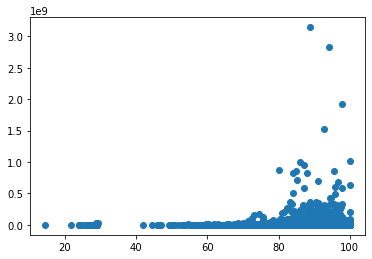

In [34]:
plt.scatter(cha.score, cha.tot_exp)

In [35]:
km = KMeans(n_clusters=3)

In [36]:
y_predicted = km.fit_predict(cha[["score", "tot_exp"]])
y_predicted

array([2, 2, 2, ..., 2, 2, 2])

In [37]:
cha["clusters1"] = y_predicted
cha["clusters1"]

0       2
1       2
2       2
3       2
4       2
       ..
8403    2
8404    2
8405    2
8406    2
8407    2
Name: clusters1, Length: 8408, dtype: int32

No handles with labels found to put in legend.


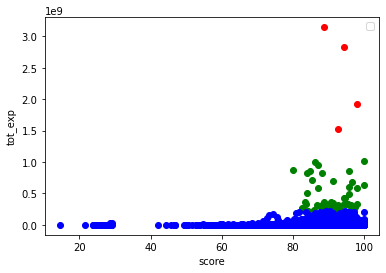

In [38]:
cluster0 = cha[cha.clusters1==0]
cluster1 = cha[cha.clusters1==1]
cluster2 = cha[cha.clusters1==2]
cluster3 = cha[cha.clusters1==3]
cluster4 = cha[cha.clusters1==4]
plt.scatter(cluster0.score, cluster0.tot_exp, color="green")
plt.scatter(cluster1.score, cluster1.tot_exp, color="red")
plt.scatter(cluster2.score, cluster2.tot_exp, color="blue")
plt.scatter(cluster3.score, cluster3.tot_exp, color="black")
plt.scatter(cluster4.score, cluster4.tot_exp, color="yellow")
plt.xlabel("score")
plt.ylabel("tot_exp")
plt.legend()

In [39]:
# change scaler (0-1) to make it more accurate while clustering 
scaler = MinMaxScaler()
scaler.fit(cha[["tot_exp"]])
cha["tot_exp_scalered"] = scaler.transform(cha[["tot_exp"]])
# cha["tot_exp_scalered"]

scaler.fit(cha[["score"]])
cha["score_scalered"] = scaler.transform(cha[["score"]])
cha["score_scalered"]

0       0.905753
1       0.831501
2       0.728718
3       0.905870
4       0.886109
          ...   
8403    0.758653
8404    0.530402
8405    0.860500
8406    0.963868
8407    0.909846
Name: score_scalered, Length: 8408, dtype: float64

In [40]:
# KMean again with scalered
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(cha[["score_scalered", "tot_exp_scalered"]])
y_predicted

array([0, 1, 1, ..., 0, 0, 0])

In [41]:
cha["clusters2"] = y_predicted
cha["clusters2"]

0       0
1       1
2       1
3       0
4       0
       ..
8403    1
8404    2
8405    0
8406    0
8407    0
Name: clusters2, Length: 8408, dtype: int32

In [42]:
km.cluster_centers_

array([[0.90896137, 0.00609885],
       [0.80152555, 0.00312874],
       [0.61641642, 0.00116624]])

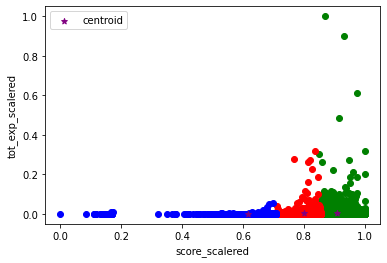

In [43]:
cluster2_0 = cha[cha.clusters2==0]
cluster2_1 = cha[cha.clusters2==1]
cluster2_2 = cha[cha.clusters2==2]
cluster2_3 = cha[cha.clusters2==3]
cluster2_4 = cha[cha.clusters2==4]
plt.scatter(cluster2_0.score_scalered, cluster2_0.tot_exp_scalered, color="green")
plt.scatter(cluster2_1.score_scalered, cluster2_1.tot_exp_scalered, color="red")
plt.scatter(cluster2_2.score_scalered, cluster2_2.tot_exp_scalered, color="blue")
plt.scatter(cluster2_3.score_scalered, cluster2_3.tot_exp_scalered, color="black")
plt.scatter(cluster2_4.score_scalered, cluster2_4.tot_exp_scalered, color="yellow")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color="purple", marker="*", label="centroid")
plt.xlabel("score_scalered")
plt.ylabel("tot_exp_scalered")
plt.legend()

Elbow Technique - to define k

In [44]:
k_rng = range(1,10)
sse = [] #sum of squared errors
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(cha[["score_scalered","tot_exp_scalered"]])
    sse.append(km.inertia_) # inertia_ will give a sse

In [45]:
sse

[78.52494762519149,
 36.50849822718192,
 22.941782542622096,
 16.10404077713579,
 11.868074189671592,
 9.30032837628467,
 7.061061810798252,
 5.4440210750882425,
 4.602957749271245]

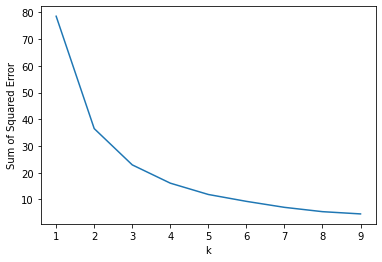

In [46]:
plt.xlabel("k")
plt.ylabel("Sum of Squared Error")
plt.plot(k_rng,sse)

my elbow is at 3, which means <h3>k=3</h3> is efficient enough to cluster cha.score and cha.tot_exp